<h1> Data Science Salaries 2023 </h1>

<h2> Explicando a base de dados </h2>
<p> A base de dados escolhida em formato csv, trata-se dos salarios de cientista de dados no ano de 2023 por área de atuação e país.

In [1]:
import numpy as np 
import pandas as pd

In [2]:
#importando dados csv
salarios = pd.read_csv('ds_salaries.csv', sep=',')
#visualizando as 5 primeiras linhas
salarios.head(10)

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
7,2023,SE,FT,Data Scientist,219000,USD,219000,CA,0,CA,M
8,2023,SE,FT,Data Scientist,141000,USD,141000,CA,0,CA,M
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M


## Características gerais da base de dados

In [3]:
#informação sobre os dados: linhas, colunas, tipo, tamanho e nulos
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
#Descrição sobre os dados numericos
salarios.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [5]:
pd.options.display.float_format = '${:,.2f}'.format

**Caracteristicas especificadas sem usar info():**

In [6]:
print("Colunas detalhes: ",salarios.columns)
print("Quantidade de linhas X colunas:",salarios.shape)

Colunas detalhes:  Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')
Quantidade de linhas X colunas: (3755, 11)


# Análise exploratória dos dados


In [7]:
df = pd.DataFrame(salarios)
df

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M
...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,SE,FT,Data Scientist,412000,USD,412000,US,100,US,L
3751,2021,MI,FT,Principal Data Scientist,151000,USD,151000,US,100,US,L
3752,2020,EN,FT,Data Scientist,105000,USD,105000,US,100,US,S
3753,2020,EN,CT,Business Data Analyst,100000,USD,100000,US,100,US,L


In [8]:
#Verificar os campos duplicados para entender cenarios e possiveis correlações
#Margens de relação
duplicados = df[df.duplicated(keep=False)]

duplicados.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
5,2023,SE,FT,Applied Scientist,222200,USD,222200,US,0,US,L
6,2023,SE,FT,Applied Scientist,136000,USD,136000,US,0,US,L
9,2023,SE,FT,Data Scientist,147100,USD,147100,US,0,US,M
10,2023,SE,FT,Data Scientist,90700,USD,90700,US,0,US,M
11,2023,SE,FT,Data Analyst,130000,USD,130000,US,100,US,M


## Checando relações numericas com mapa de calor

In [9]:
salarios.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


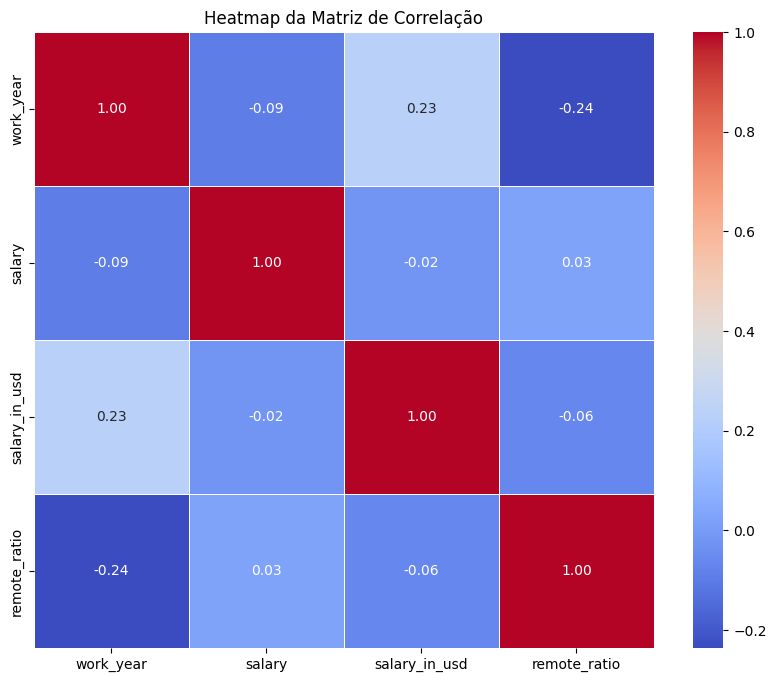

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Selecionar apenas as colunas numéricas
colunas_numericas = salarios.select_dtypes(include=['float64', 'int64']).columns
df_numerico = salarios[colunas_numericas]
 
# Calcular a correlação entre as variáveis numéricas
correlation_matriz = df_numerico.corr()
 
# Criar uma matriz de anotações com os valores formatados
annotations = np.array([[f"{val:.2f}" for val in row] for row in correlation_matriz.to_numpy()])
 
# Plotar o heatmap da matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matriz, annot=annotations, cmap='coolwarm', fmt='', linewidths=0.5)
plt.title('Heatmap da Matriz de Correlação')
plt.show()

C:\Users\lilit\AppData\Local\Temp\ipykernel_19320\859065299.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=salarios,x='work_year', palette='tab10')


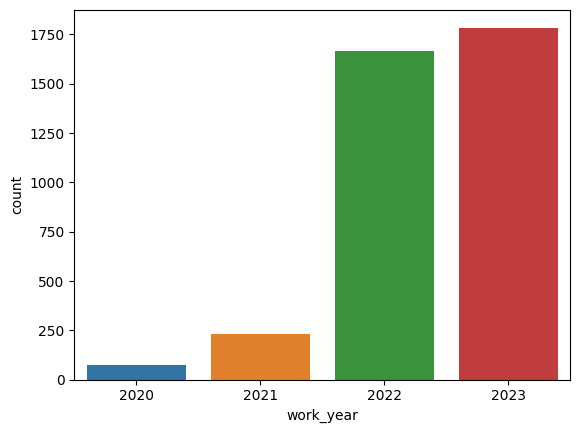

In [11]:
sns.countplot(data=salarios,x='work_year', palette='tab10')
plt.show()

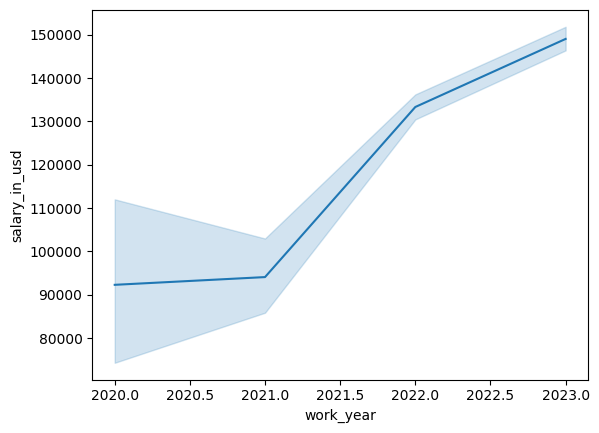

In [12]:
sns.lineplot(data=salarios, x="work_year", y="salary_in_usd")
plt.show()

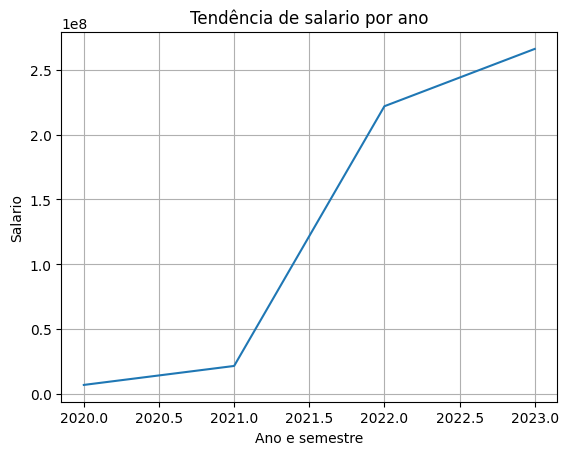

In [13]:
#Relação entre trabalho por ano

salario_Ano = salarios.groupby(['work_year']).sum()
salario_Ano['salary_in_usd'].plot(kind='line')
plt.title('Tendência de salario por ano')
plt.xlabel('Ano e semestre')
plt.ylabel('Salario')
plt.grid(True)
plt.show()

## Qual a media de salario por área de atuação?

In [14]:
salarios['salary'].mean()

np.float64(190695.57177097205)

In [15]:
salarios.groupby('job_title')['salary'].mean(numeric_only= True)

job_title
3D Computer Vision Researcher   $120,000.00
AI Developer                    $137,181.82
AI Programmer                    $55,000.00
AI Scientist                    $275,312.50
Analytics Engineer              $151,352.62
                                    ...    
Research Engineer               $162,752.81
Research Scientist              $160,768.89
Software Data Engineer           $75,000.00
Staff Data Analyst               $15,000.00
Staff Data Scientist            $105,000.00
Name: salary, Length: 93, dtype: float64

In [16]:
salarios.groupby('job_title')[['salary_in_usd']].mean().sort_values('salary_in_usd')

,salary_in_usd
job_title,
Power BI Developer,"$5,409.00"
Product Data Scientist,"$8,000.00"
Staff Data Analyst,"$15,000.00"
3D Computer Vision Researcher,"$21,352.25"
Autonomous Vehicle Technician,"$26,277.50"
...,...
Principal Data Scientist,"$198,171.12"
Data Analytics Lead,"$211,254.50"
Data Lead,"$212,500.00"


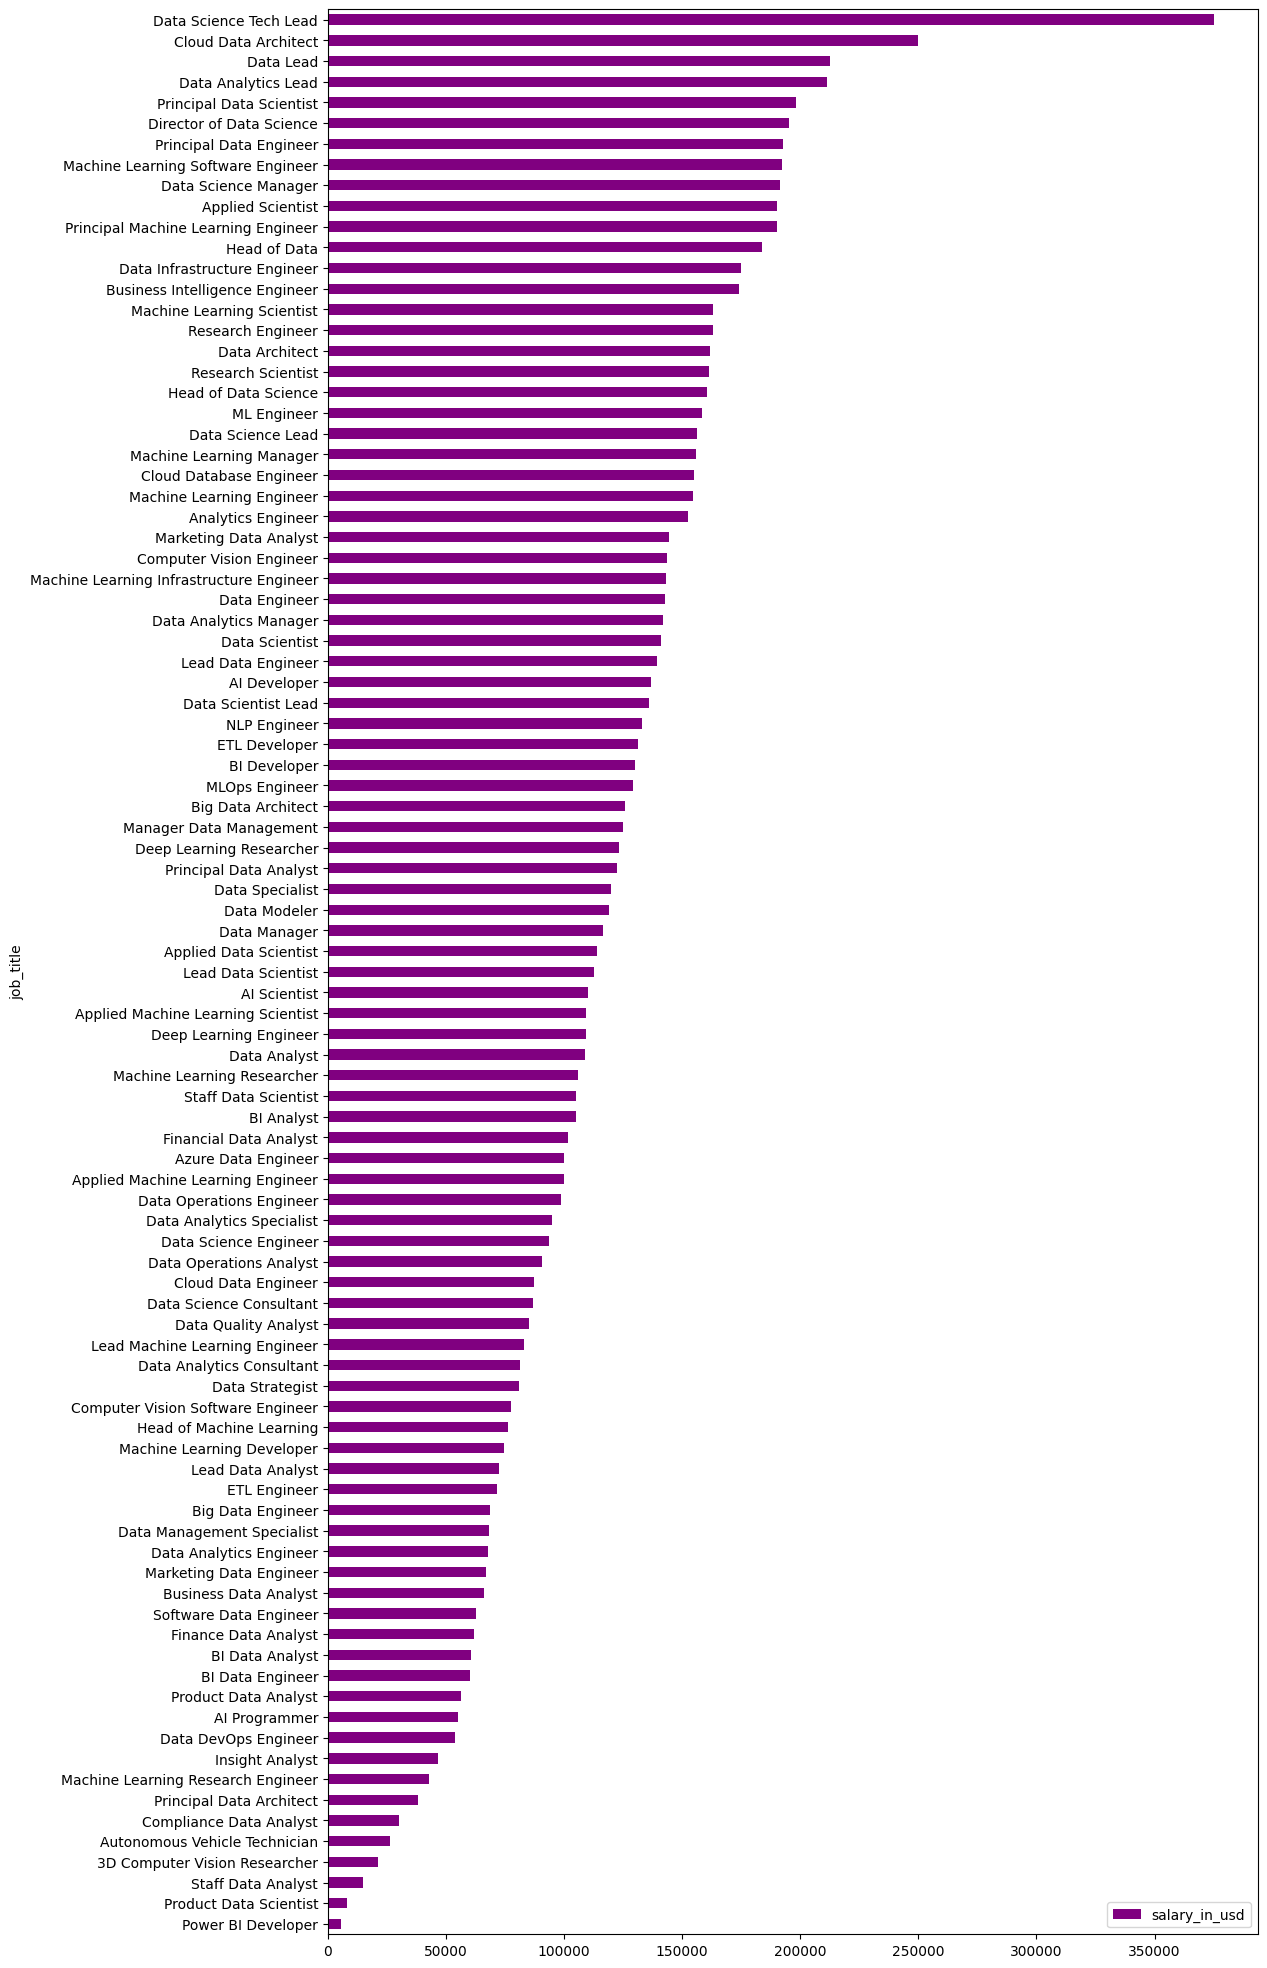

In [18]:
salario_area = salarios.groupby('job_title')[['salary_in_usd']].mean().sort_values('salary_in_usd')
salario_area.plot(kind='barh', figsize=(12, 25), color ='purple');

In [17]:
mediaSalarios = salarios.groupby('job_title')['salary'].mean(numeric_only= True)